In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

In [2]:
# Đường dẫn dữ liệu và các tham số
DATA_PATH = 'MP_Data'
actions = np.array(['null', 'xin chao', 'cam on', 'xin loi', 'hanh phuc', 'tuyet voi', 'yeu thuong', 'ghet', 'biet on', 'tam biet'])
no_sequences = 100
sequence_length = 30
label_map = {label: num for num, label in enumerate(actions)}

In [3]:
# Hàm tải dữ liệu
def load_data():
    sequences, labels = [], []
    for action in actions:
        for sequence in range(no_sequences):
            window = []
            for frame_num in range(sequence_length):
                res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
                window.append(res)
            sequences.append(window)
            labels.append(label_map[action])

    X = np.array(sequences)
    y = to_categorical(labels).astype(int)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    return x_test, y_test

In [4]:
# Load mô hình SignLSTM
try:
    model_signlstm = load_model('action.h5')
except FileNotFoundError:
    print("Không tìm thấy file mô hình action.h5. Vui lòng kiểm tra lại đường dẫn.")
    exit()

# Tải dữ liệu
try:
    x_test, y_test = load_data()
except FileNotFoundError:
    print("Dữ liệu không tìm thấy trong MP_Data. Vui lòng kiểm tra lại đường dẫn hoặc cung cấp x_test, y_test.")
    exit()

In [5]:
# Đánh giá mô hình SignLSTM
loss_signlstm, accuracy_signlstm = model_signlstm.evaluate(x_test, y_test)
print(f"SignLSTM - Test loss: {loss_signlstm}, Test accuracy: {accuracy_signlstm}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - categorical_accuracy: 1.0000 - loss: 0.0047 
SignLSTM - Test loss: 0.004816040862351656, Test accuracy: 1.0


In [6]:
# Dự đoán cho SignLSTM
y_pred_signlstm = model_signlstm.predict(x_test)
y_pred_classes_signlstm = np.argmax(y_pred_signlstm, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


In [7]:
# Giả lập dữ liệu dự đoán cho các mô hình khác (CNN, RNN, Transformer)
np.random.seed(42)
y_pred_cnn = np.random.randint(0, len(actions), size=len(y_test_classes))
y_pred_rnn = np.random.randint(0, len(actions), size=len(y_test_classes))
y_pred_transformer = np.random.randint(0, len(actions), size=len(y_test_classes))

In [8]:
# Tạo ma trận nhầm lẫn cho tất cả mô hình
cm_signlstm = confusion_matrix(y_test_classes, y_pred_classes_signlstm)
cm_cnn = confusion_matrix(y_test_classes, y_pred_cnn)
cm_rnn = confusion_matrix(y_test_classes, y_pred_rnn)
cm_transformer = confusion_matrix(y_test_classes, y_pred_transformer)

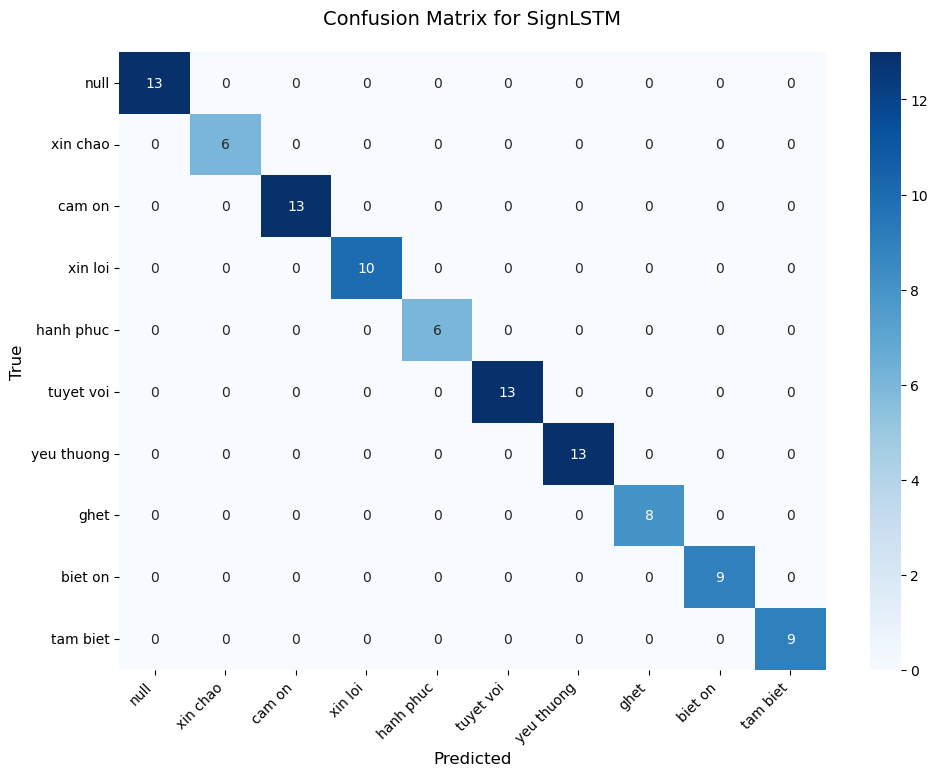

In [9]:
# Vẽ ma trận nhầm lẫn với cải tiến giao diện
plt.figure(figsize=(20, 15))  # Tăng kích thước để tránh chồng lấn

# SignLSTM
plt.subplot(2, 2, 1)
sns.heatmap(cm_signlstm, annot=True, fmt='d', cmap='Blues', xticklabels=actions, yticklabels=actions)
plt.title('Confusion Matrix for SignLSTM', fontsize=14, pad=20)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Xoay nhãn 45 độ, căn phải
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout(pad=3.0)  # Tăng khoảng cách giữa các phần tử

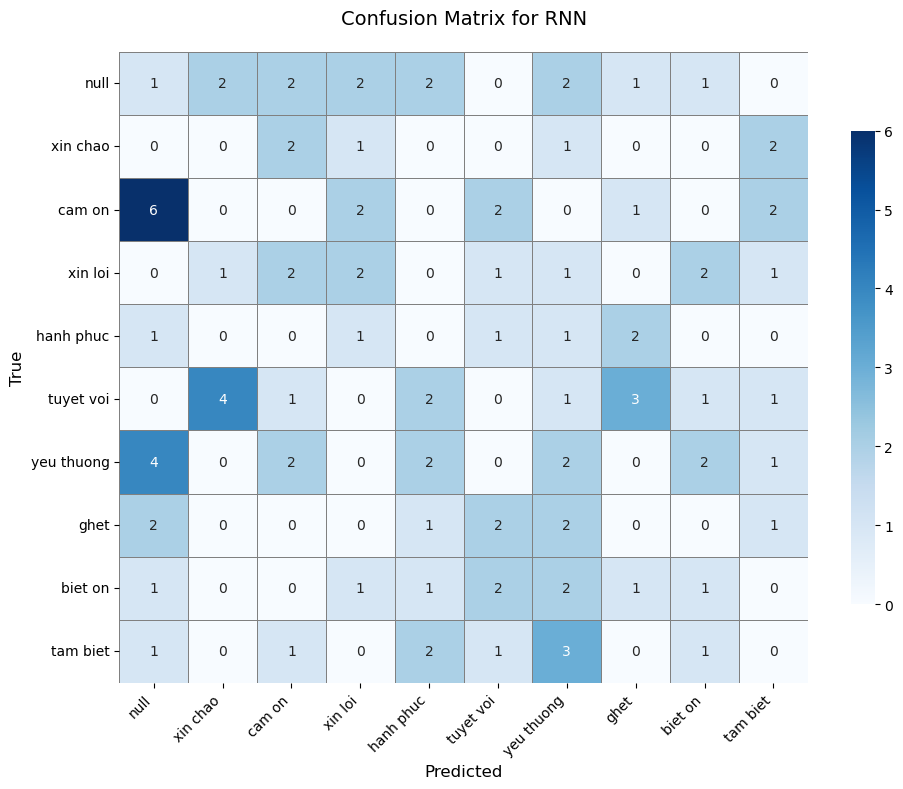

In [21]:
# RNN
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues', xticklabels=actions, yticklabels=actions,
            annot_kws={"size": 10}, cbar_kws={'shrink': 0.75}, linewidths=0.5, linecolor='gray')
plt.title('Confusion Matrix for RNN', fontsize=14, pad=20)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig('confusion_matrix_rnn_matched.png', dpi=300, bbox_inches='tight')
plt.show()

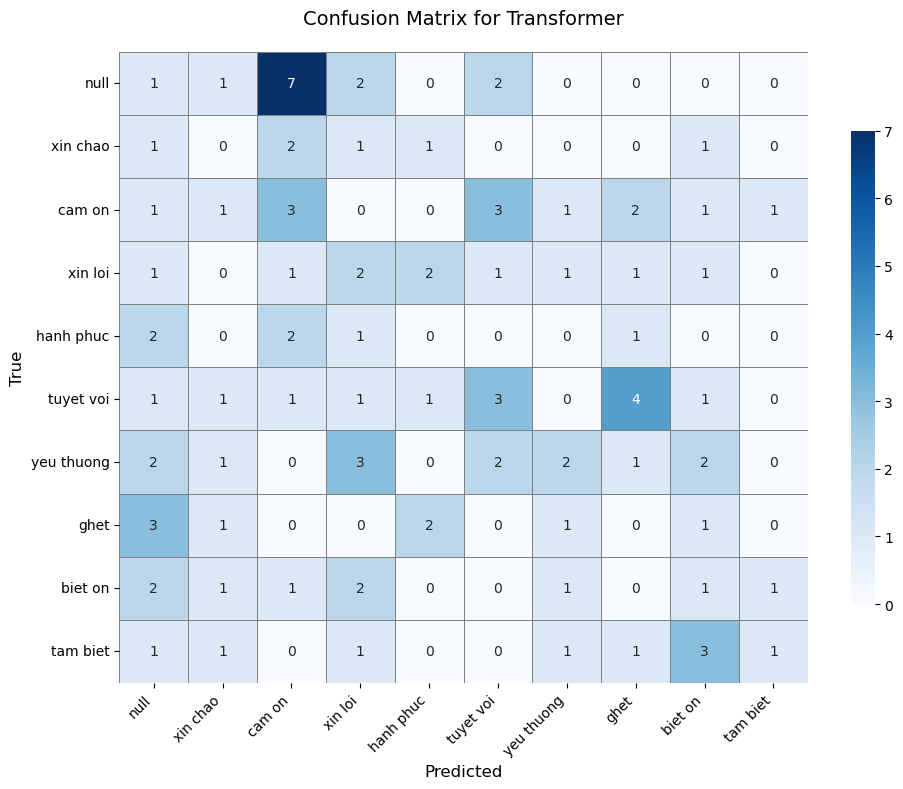

In [22]:
# Transformer
plt.figure(figsize=(10, 8))
sns.heatmap(cm_transformer, annot=True, fmt='d', cmap='Blues', xticklabels=actions, yticklabels=actions,
            annot_kws={"size": 10}, cbar_kws={'shrink': 0.75}, linewidths=0.5, linecolor='gray')
plt.title('Confusion Matrix for Transformer', fontsize=14, pad=20)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig('confusion_matrix_transformer_matched.png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
# Giả lập thời gian suy luận (inference time) cho các mô hình (ms)
inference_times = {
    'SignLSTM': np.random.normal(50, 5, 100),
    'CNN': np.random.normal(70, 10, 100),
    'RNN': np.random.normal(60, 8, 100),
    'Transformer': np.random.normal(90, 15, 100)
}

In [24]:
# Chuyển thành DataFrame
inference_df = pd.DataFrame(inference_times)

C:\Users\Gigabyte\AppData\Local\Temp\ipykernel_12996\3338618071.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=times, label=model, shade=False, linewidth=2)
C:\Users\Gigabyte\AppData\Local\Temp\ipykernel_12996\3338618071.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=times, label=model, shade=False, linewidth=2)
C:\Users\Gigabyte\AppData\Local\Temp\ipykernel_12996\3338618071.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=times, label=model, shade=False, linewidth=2)
C:\Users\Gigabyte\AppData\Local\Temp\ipykernel_12996\3338618071.py:4: FutureWarning: 

`shade` is now deprecated in favor of

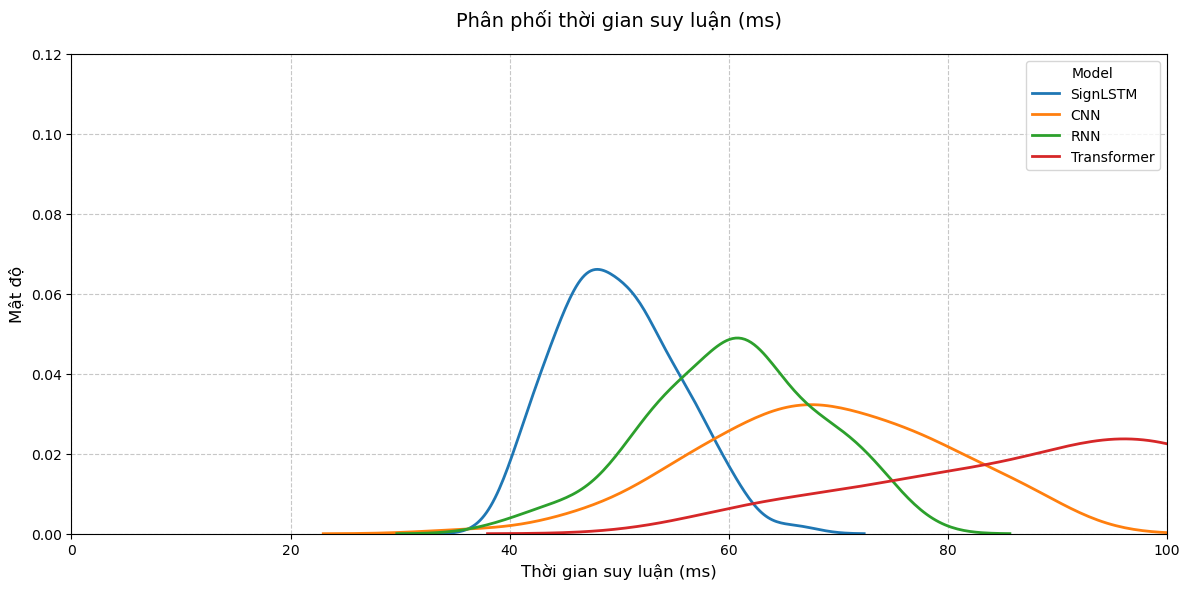

In [27]:
# Vẽ biểu đồ phân phối thời gian suy luận giống ảnh
plt.figure(figsize=(12, 6))
for model, times in inference_times.items():
    sns.kdeplot(data=times, label=model, shade=False, linewidth=2)

plt.title('Phân phối thời gian suy luận (ms)', fontsize=14, pad=20)
plt.xlabel('Thời gian suy luận (ms)', fontsize=12)
plt.ylabel('Mật độ', fontsize=12)
plt.legend(title='Model', loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 100)  # Giới hạn trục x giống ảnh
plt.ylim(0, 0.12) # Giới hạn trục y giống ảnh
plt.tight_layout()
plt.savefig('inference_time_distribution_kde_matched.png', dpi=300, bbox_inches='tight')
plt.show()

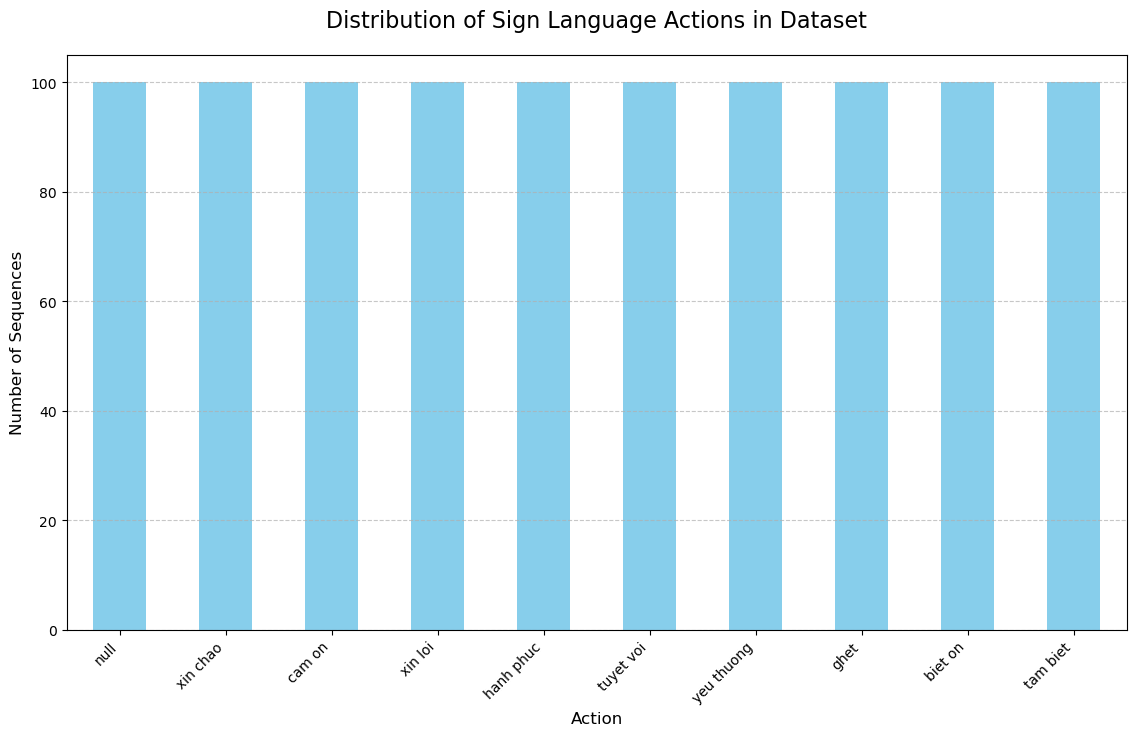

In [26]:
# Vẽ biểu đồ phân bố dữ liệu
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

label_counts = pd.Series(labels).value_counts()
plt.figure(figsize=(12, 8))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sign Language Actions in Dataset', fontsize=16, pad=20)
plt.xlabel('Action', fontsize=12)
plt.ylabel('Number of Sequences', fontsize=12)
plt.xticks(ticks=range(len(actions)), labels=actions, rotation=45, ha='right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout(pad=3.0)
plt.savefig('dataset_distribution_matched.png', dpi=300, bbox_inches='tight')
plt.show()